In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/kaggle/input/mcdonalds-dataset/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Exploratoring Data

In [14]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [15]:
# dataset shape (rows, columns)
print(df.shape)
df.info()

(1453, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [16]:
# converting categorical columns into numeric columns and computing column means

# converting categorical columns to numerical
MD_x=df.iloc[:,0:11].apply(lambda x: (x=='Yes').astype(int))

# calculating column means; rounding off upto 2 decimals
col_means=np.round(MD_x.mean(),2)
col_means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [17]:
# creating a perceptual map by computing PCA

from sklearn.decomposition import PCA
# making an object of PCA
pca=PCA()
df1=pca.fit_transform(MD_x)
MD_pca=pd.DataFrame(df1,columns=MD_x.columns)

# printing summary
num= len(pca.explained_variance_ratio_) + 1 #number of column
summary=pd.DataFrame(index=[f"PC{i}" for i in range(1, num)])
summary['standard-deviation']=np.round(np.sqrt(pca.explained_variance_),5)
summary['proportion-of-variance']=np.round(pca.explained_variance_ratio_,5)
summary['cumulative-proportion']=np.round(np.cumsum(pca.explained_variance_ratio_),5)
summary

,standard-deviation,proportion-of-variance,cumulative-proportion
PC1,0.75705,0.29945,0.29945
PC2,0.60746,0.19280,0.49224
PC3,0.50462,0.13305,0.62529
PC4,0.39880,0.08310,0.70839
PC5,0.33741,0.05948,0.76787
PC6,0.31027,0.05030,0.81817
PC7,0.28970,0.04385,0.86201
PC8,0.27512,0.03955,0.90156
PC9,0.26525,0.03676,0.93832
PC10,0.24884,0.03235,0.97068


In [18]:
# PCA transformed values
MD_pca

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [19]:
# factor loadings for the PCA performed: indicates how the original values are combined to form principal components.
factor_loadings=pd.DataFrame(np.round(pca.components_.T,2), index=MD_x.columns, columns=[f"PC{i}" for i in range(1, num)])
factor_loadings

# transpose of factor loadings is rotation matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.48,0.36,-0.30,0.06,-0.31,0.17,-0.28,0.01,0.57,-0.11,0.05
convenient,-0.16,0.02,-0.06,-0.14,0.28,-0.35,-0.06,-0.11,-0.02,-0.67,-0.54
spicy,-0.01,0.02,-0.04,0.20,0.07,-0.36,0.71,0.38,0.40,-0.08,0.14
fattening,0.12,-0.03,-0.32,-0.35,-0.07,-0.41,-0.39,0.59,-0.16,-0.01,0.25
greasy,0.30,-0.06,-0.80,0.25,0.36,0.21,0.04,-0.14,-0.00,0.01,0.00
fast,-0.11,-0.09,-0.06,-0.10,0.11,-0.59,-0.09,-0.63,0.17,0.24,0.34
cheap,-0.34,-0.61,-0.15,0.12,-0.13,-0.10,-0.04,0.14,0.08,0.43,-0.49
tasty,-0.47,0.31,-0.29,-0.00,-0.21,-0.08,0.36,-0.07,-0.64,0.08,0.02
expensive,0.33,0.60,0.02,0.07,-0.00,-0.26,-0.07,0.03,0.07,0.45,-0.49
healthy,-0.21,0.08,0.19,0.76,0.29,-0.18,-0.35,0.18,-0.19,-0.04,0.16


/tmp/ipykernel_30/4012291541.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.quiver(0, 0, cols[0], cols[1], color='red', label= feature_name, alpha=0.8, scale=2)
/tmp/ipykernel_30/4012291541.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(feature_name, (cols[0], cols[1]),textcoords='data', color='black', size=9)


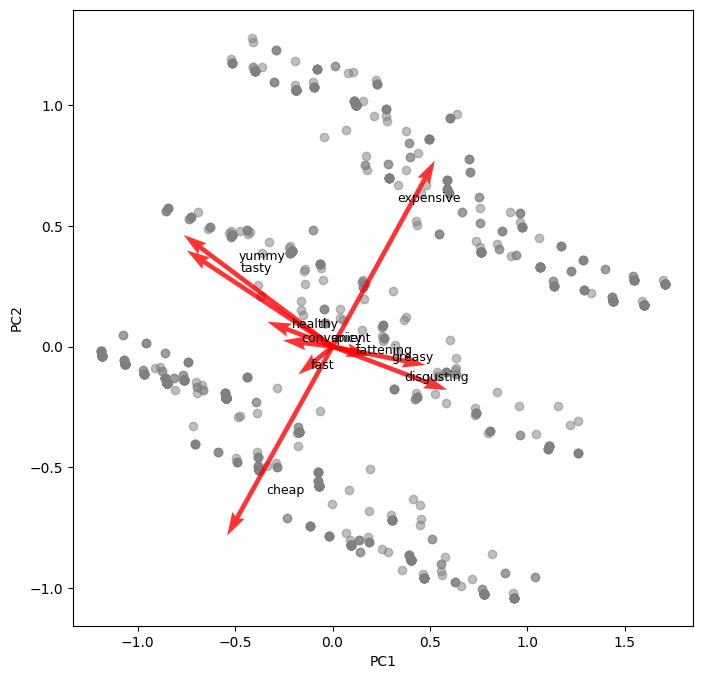

In [20]:

# projecting data onto the first two principal components
projected_data=pca.transform(MD_x)

# plotting the projected data points
plt.figure(figsize=(8,8))
plt.scatter(projected_data[:,0], projected_data[:,1], color='gray', label='consumers', alpha=0.5)

# adding arrows in the data
for feature_name, cols in factor_loadings.iterrows():
  plt.quiver(0, 0, cols[0], cols[1], color='red', label= feature_name, alpha=0.8, scale=2)
  plt.annotate(feature_name, (cols[0], cols[1]),textcoords='data', color='black', size=9)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

# Extracting Segments

In [21]:
# importing important libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# defining lists to store values
inertia=[]
cluster_result=[] #k_result
silhouette_scores={}

# initializing variables to store results
best_cluster_num=2
best_silhouette_score=-1

# running the loop for different cluster values
for k in range(2,9):
  km=KMeans(n_clusters=k, n_init=10, random_state=10) #creating kmeans object
  km.fit(MD_pca) #fitting kmeans
  labels=km.predict(MD_pca) #prediction
  s_score=silhouette_score(MD_pca, labels) #calculating silhouette score
  silhouette_scores[k]=s_score #storing sihouette score result
  inertia.append(km.inertia_) #storing inertia result
  cluster_result.append(labels) #storing cluster result

  # updating the best cluster values
  if s_score> best_silhouette_score:
    best_silhouette_score= s_score
    best_cluster_num= k

print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(silhouette_scores)

Best cluster number is: 8
Silhouette score for the best cluster number: 0.28508254932783417
{2: 0.2444170182624306, 3: 0.23911913228504783, 4: 0.25952636419984104, 5: 0.2597992470423093, 6: 0.26810920284309814, 7: 0.27631527047260357, 8: 0.28508254932783417}


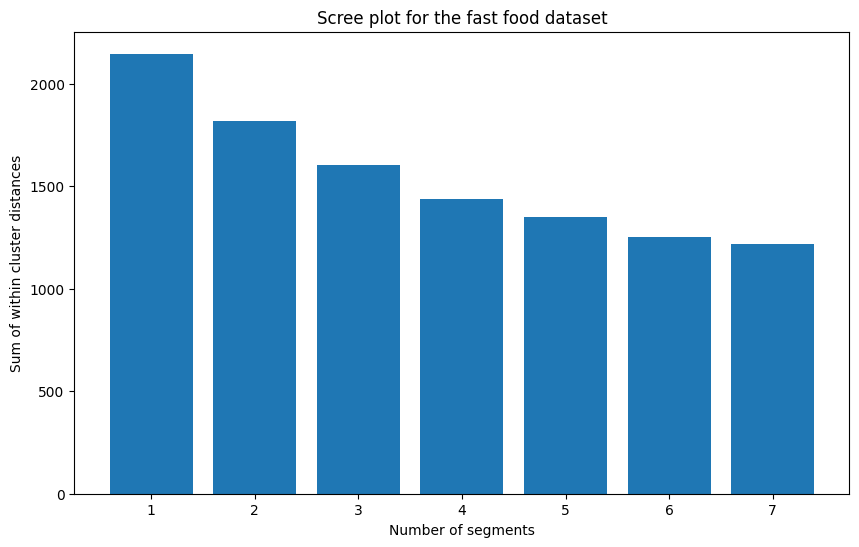

In [22]:
# plotting scree plot for the best_cluster_number
# scree plot
# explained_variance_ratio= cols_pca.explained_variance_ratio_

# plotting
plt.figure(figsize=(10,6))
plt.bar(range(1,len(inertia)+1), inertia)
plt.title('Scree plot for the fast food dataset')
plt.ylabel('Sum of within cluster distances')
plt.xlabel('Number of segments');

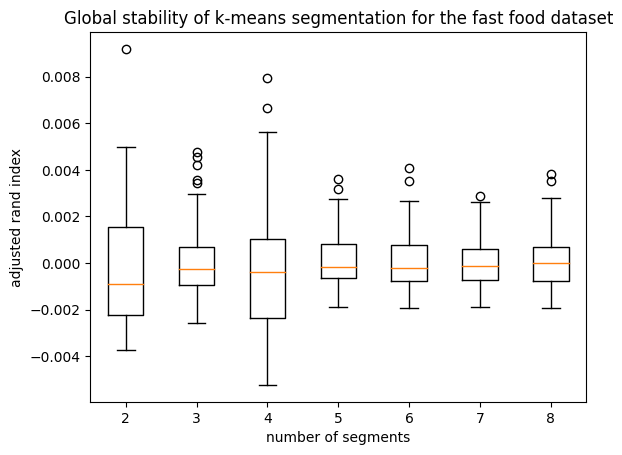

In [23]:
# Global stability results
from sklearn.metrics import adjusted_rand_score
# applying bootstrapping
n_bootstraps=100 #n_boot
ARI_scores=[]
for labels in cluster_result:
  ari_boot=[]
  for _ in range(n_bootstraps):
    random_sample=np.random.choice(labels, size=len(labels), replace=True)
    ari = adjusted_rand_score(labels, random_sample)
    ari_boot.append(ari)
  ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2,9))
plt.xlabel('number of segments')
plt.ylabel('adjusted rand index')
plt.title('Global stability of k-means segmentation for the fast food dataset')
plt.show()

Cluster 4 looks stable according to the above plot.

# Profiling Segments

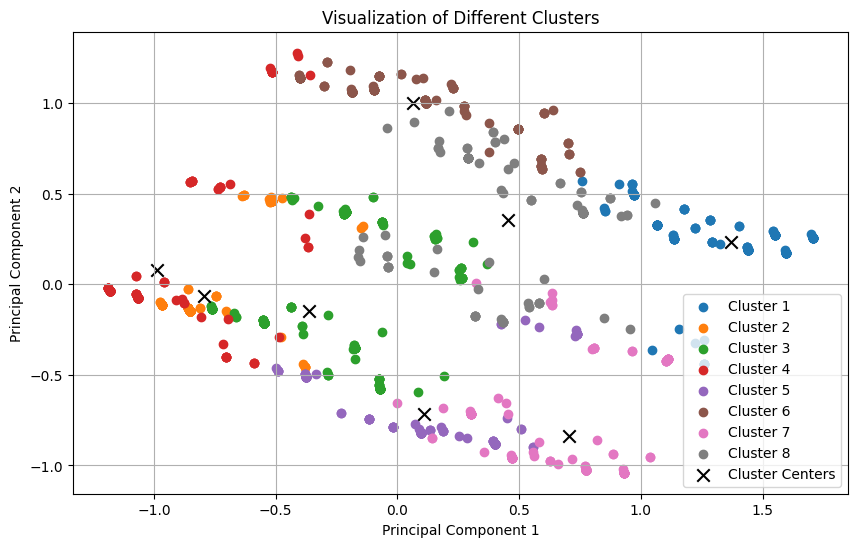

In [24]:
# performing kmeans clustering with the best cluster number: 7
kmeans = KMeans(n_clusters=best_cluster_num, random_state=1234, n_init=10)
labels = kmeans.fit_predict(MD_pca)

# setting up the figure
plt.figure(figsize=(10, 6))

# plotting data points
for cluster_num in range(best_cluster_num):
    cluster_data = MD_pca[labels == cluster_num]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

# plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Different Clusters')
plt.legend(loc='best')
plt.grid(True)
plt.show()


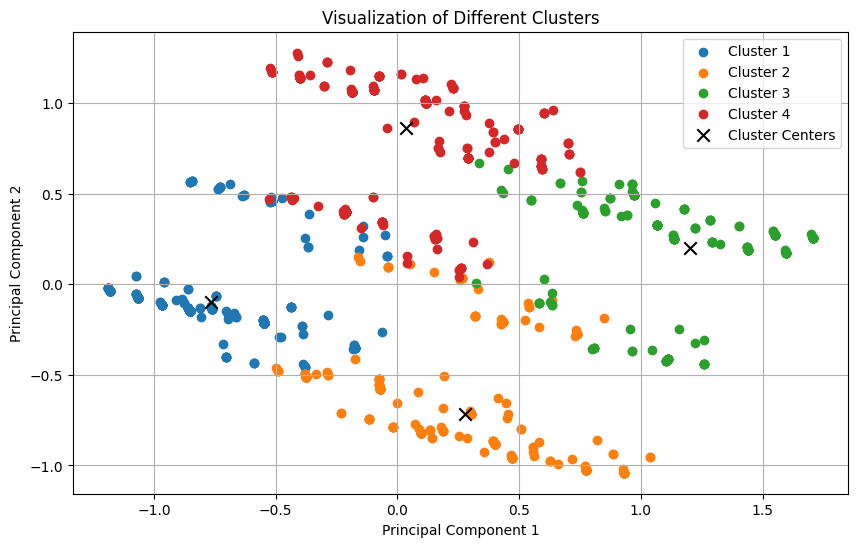

In [25]:
# performing kmeans clustering with the most stable cluster number: 4
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
labels = kmeans.fit_predict(MD_pca)

# setting up the figure
plt.figure(figsize=(10, 6))

# plotting data points
for cluster_num in range(4):
    cluster_data = MD_pca[labels == cluster_num]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

# plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Different Clusters')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Comparing the two above scatter plots, it can be concluded that the optimum number of clusters should be =4, as the clusters are well defined.

/tmp/ipykernel_30/1443281686.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.quiver(0, 0, cols[0], cols[1], color='black', label= feature_name, alpha=0.6, scale=2)
/tmp/ipykernel_30/1443281686.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(feature_name, (cols[0], cols[1]),textcoords='data', color='black', size=9)


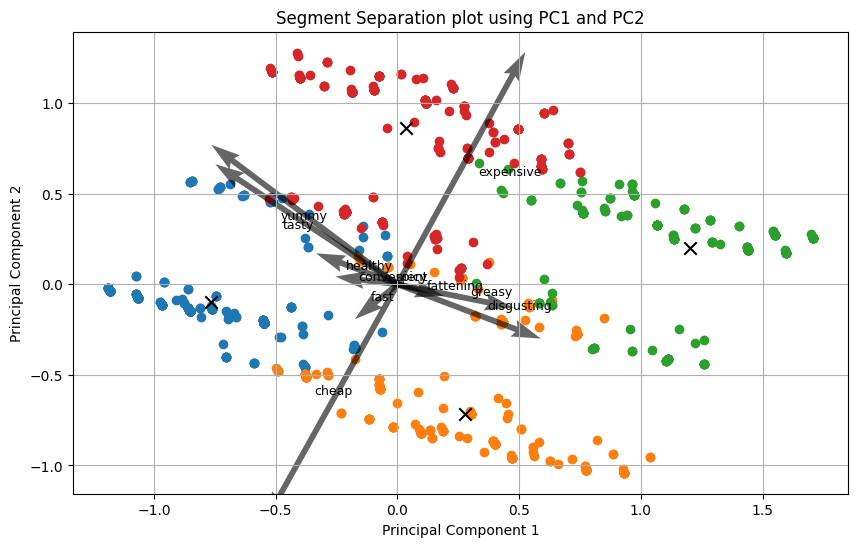

In [26]:
# setting up the figure
plt.figure(figsize=(10, 6))

# plotting data points
for cluster_num in range(4):
    cluster_data = MD_pca[labels == cluster_num]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

# plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

# adding arrows in the data
for feature_name, cols in factor_loadings.iterrows():
  plt.quiver(0, 0, cols[0], cols[1], color='black', label= feature_name, alpha=0.6, scale=2)
  plt.annotate(feature_name, (cols[0], cols[1]),textcoords='data', color='black', size=9)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation plot using PC1 and PC2')
plt.grid(True)
plt.show()


# Describing segments

In [27]:
# merging cluster labels to the original dataset df
cluster_labels=pd.Series(labels)
df['cluster-labels']=cluster_labels
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster-labels
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,3
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,3
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,1


In [28]:
# making changes in the column like for cleaner visualization
df['Like']= df['Like'].replace({'I love it!+5': '+5', 'I hate it!-5': '-5'})

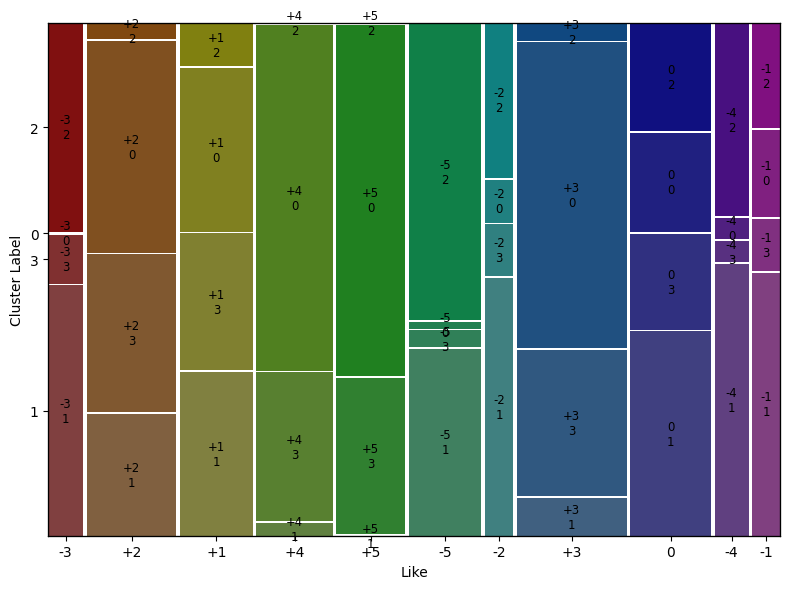

In [29]:
# generating a mosaic plot to visualize consumer behaviour across different segments

#Like vs segments

# importing mosaic method
from statsmodels.graphics.mosaicplot import mosaic

# setting up figure
fig, ax= plt.subplots(figsize=(8,6))

# plotting mosaic plot
mosaic(df, ['Like', 'cluster-labels'], ax=ax)

# setting x and y axis labels
ax.set_xlabel('Like')
ax.set_ylabel('Cluster Label')

# additional customization
plt.tight_layout()
plt.show()

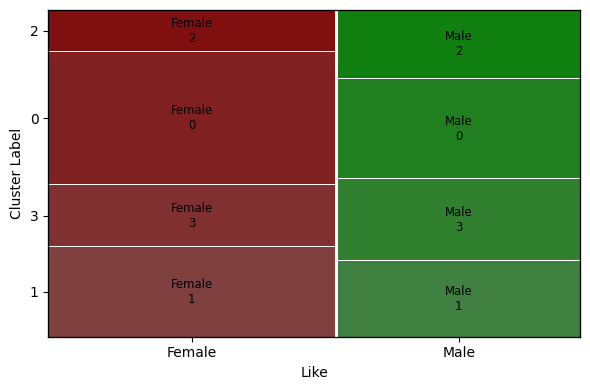

In [30]:
# Gender vs Segments

# setting up figure
fig, ax= plt.subplots(figsize=(6,4))

# plotting mosaic plot
mosaic(df, ['Gender', 'cluster-labels'], ax=ax)

# Set x and y axis labels
ax.set_xlabel('Like')  # Replace with your desired x-axis label
ax.set_ylabel('Cluster Label')  # Replace with your desired y-axis label

# Additional customization (optional)
plt.tight_layout()
plt.show()

In [31]:
# converting visiting frequency to numeric values
df['VisitFrequency'] = df['VisitFrequency'].replace({
    'Every three months':1/(4*3),
    'Once a week':1,
    'Once a month':1/4,
    'Once a year':1/52,
    'More than once a week':2,
    'Never':0
})

/tmp/ipykernel_30/320889164.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VisitFrequency'] = df['VisitFrequency'].replace({


In [32]:
# converting like column into numeric for easy analysis
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# calculating means
visit_mean=df.groupby('cluster-labels')['VisitFrequency'].mean()

like_mean=df.groupby('cluster-labels')['Like'].mean()

female_means = df.groupby('cluster-labels')['Gender'].apply(lambda x: (x=='Female').mean())

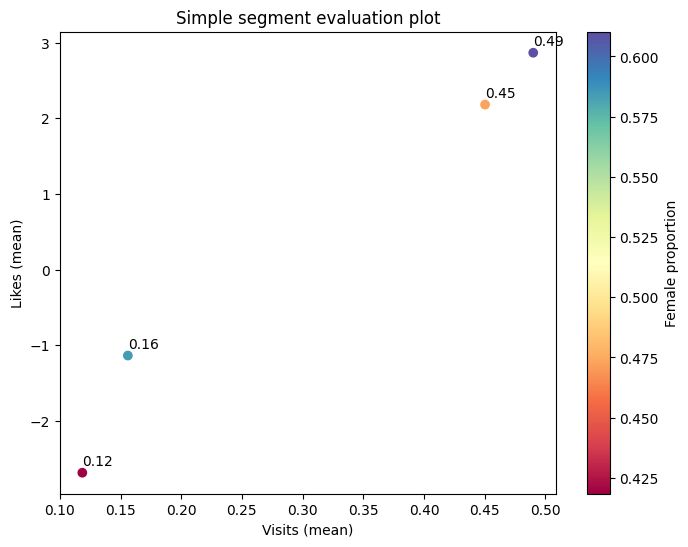

In [33]:
# setting up the figure
plt.figure(figsize=(8,6))

# plotting the scatter plot
plt.scatter(visit_mean, like_mean, c=female_means, cmap='Spectral')

# adding labels
plt.xlabel('Visits (mean)')
plt.ylabel('Likes (mean)')
plt.title('Simple segment evaluation plot')
plt.colorbar(label='Female proportion')

# annotating the data points
for i,j,k in zip(visit_mean, like_mean, visit_mean):
    plt.text(i, j+0.1, round(k, 2))
plt.show()